<a href="https://colab.research.google.com/github/Gianfry-developer/Processing/blob/master/Progetto_TII_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto di : Trattamento dell'Incertezza nell'Informazione
## di Gianfranco Semeraro mat. ######

## Utilizzo della libreria **paramonte** per *python*.

Come primo passo installiamo la libreria paramonte per poterla utilizzare.

In [ ]:
!pip install paramonte

     |████████████████████████████████| 50.1MB 83kB/s 


In [ ]:
import paramonte as pm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
pm.verify()


:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
::::                                                                                       ::::

       _/_/_/_/                                   _/_/    _/_/
        _/    _/                                  _/_/_/_/_/                     _/
       _/    _/ _/_/_/_/   _/ /_/_/ _/_/_/_/     _/  _/  _/   _/_/   _/_/_/   _/_/_/  _/_/_/
      _/_/_/   _/    _/   _/_/     _/    _/     _/      _/  _/   _/ _/    _/   _/   _/_/_/_/                        
     _/       _/    _/   _/       _/    _/     _/      _/  _/   _/ _/    _/   _/   _/    
  _/_/_/       _/_/_/_/ _/         _/_/_/_/ _/_/_/  _/_/_/  _/_/  _/    _/   _/_/   _/_/_/


                                          ParaMonte
                                   plain powerful parallel
                                     Monte Carlo library
                                        Version 2.5.2

::::                                       

#### Sezione Introduttiva

##### Paramonte

ParaMonte è una libreria scritta per poter effettuare il campionamento di funzioni 
matematiche.<br>
Tale campionamento è stato sviluppato con l'obiettivo di avere le caratteristiche di essere robusto e con alte prestazioni nel suo uso sia seriale che in parallelo.<br>
Nel nome è evidenziato lo strumento che viene usato per poter effettuare il campionamento, ovvero le simulazioni di Monte Carlo.<br>
Come viene riportato nella sua documentazione, ParaMonte è stato pensato per poter essere utilizzato per il campionamento di distribuzioni a posteriori di modelli Bayesiani per la data science, per il machine learning e per l'inferenza scientifica.

Nella documentazione ci vengono presentate anche delle caratteristiche più **_operazionali_** come:
- la convenzione dei nomi in camelCase;
- le specifiche delle simulazioni iniziano tutte con la lettera minuscola (scalari, vettori, matrici ...);
- se stiamo usando vettori o matrici o liste dovremmo indicarlo con un suffiso specifico nel nome della variabile. I suffisi sono rispettivamente : 'Vec', 'Mat' e 'List';
- le funzioni o metodi di classe devono avere il nome che inizia con un verbo in lettere minuscole;
- i nomi delle variabile dovrebbero formare delle proposizioni con alla fine un verbo passivo tale che abbia senso (sulla guida indica come vincolo che abbia senso in inglese);


Di seguito verrà mostrata la sua distribuzione per il linguaggio di programmazione python.

Per poter utilizzare la libreria e il suo campionamento avremo bisogno dell'uso dell'oggetto "*ParaDRAM*" e successivamente il metodo **runSampler()**.<br>
Questo metodo necessità di due parametri obbligatori ed uno opzionale:
- **ndim** che indica il numero di dimensioni del dominio della funzione obiettivo;
- **getLogFunc** che deve ricevere la funzione obiettivo;
- **inputFile** (opzionale) riceve il percorso del file che contiene le specifiche delle simulazioni di ParaMonte. Normalmente tali specifiche sono settate automaticamente ai valori di default.

Di seguito vedremo l'uso più semplice della libreria.

In [ ]:
# Definiamo una semplice funzione
getLogFunc = lambda x : -x**2
# Istanziamo l'oggetto ParaDRAM
pmpd = pm.ParaDRAM()
# Andiamo ad eseguire il campionatore.
pmpd.runSampler ( ndim = 1, getLogFunc = getLogFunc)


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-format output restart file.
ParaDRAM 

Una volta aver campionato la funzione obiettivo, la stessa funzione di campionamento ci suggerisci dei metodi per poter proseguire nell'analisi dei risultati.<br>

Possiamo continuare con l'analisi dei risultati solo dopo che le simulazioni siano finite con successo poichè la libreria creerà 5 file dove sono salvati i dati che ci serviranno.

I file possono avere il prefisso assegnatoli tramite l'attributo **outputFileName** delle *specs* dell'oggetto *ParaDRAM*.<br>Esempio :
```
pmpd.specs.outputFileName = './content/test'
```
<br>

Se non viene indacato verrà usato quello *standard* che è del tipo : "ParaDRAM_run_yyyyMMdd_HHmmss_".<br>
Successivamente ci sarà l'indicazione del processo padre nel formato : **process_#_** dove *#* è un placeholder per il numero di processore che ha generato i file. Quindi in modalità **multiChain** avreno file diversi per processo.


Il nome del file sarà completato con un suffisso diverso per ogni file creato : *_progress.txt*, *_report.txt*, *_sample.txt*, *_chain.txt* o *_chain.bin* e *_restart.txt* o *_restart.bin*.

###### File di report

Il file di report è il file che termina con *_report.txt*. <br>
Questo file è usato per contenere le impostazioni della simulazione nell'ordine:<br>
1. Specifiche del banner di ParaDRAM e le specifiche delle versioni;
2. Le specifiche del processore su cui le simulazioni sono performate;  
3. Le specifiche della simulazione ParaDRAM insieme ai suoi vaori e alla descrizione;
4. I dettagli rilevanti riguardo il tempo e le prestazioni della simulazione;
5. Se tutto finisce bene avremo le statistiche riguardo al risultato delle simulazioni;
6. Ed infine la scritta **Mission Accomplished**.

In [ ]:
pmpd.readReport()


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/ParaDRAM_run_20210223_204510_160*_report.txt"


ParaDRAM - NOTE: processing report file: /content/ParaDRAM_run_20210223_204510_160_process_1_report.txt
ParaDRAM - NOTE: reading the file contents... ParaDRAM - NOTE: parsing the report file contents...
done in 0.015828 seconds.

ParaDRAM - NOTE: The processed report files are now stored in the newly-created
ParaDRAM - NOTE: component `reportList` of the ParaDRAM object as a Python list.
ParaDRAM - NOTE: For example, to access the entire contents of the first (or the only) report file, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.reportList[0].contents.print()
ParaDRAM - NOTE: 
ParaDRAM - NOTE: where you will have to replace `pmpd` with your ParaDRAM instance name.
ParaDRAM - NOTE: To access the simulation statistics and information, examine the contents of the
ParaDRAM - NOTE: components of the following structures:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.reportLi

Utilizzando la funzione *readReport()*, possiamo leggere le informazioni che sono state scritte sul file "*_report.txt".<br>
Tali informazioni non sono immediatamente stampate ma vanno richiamate attraverso le funzioni che sono state suggerite dalla libreria.

Di seguito mostriamo un piccolo esempio.

In [ ]:
pmpd.reportList[0].contents.print()

  
************************************************************************************************************************************ 
************************************************************************************************************************************ 
****                                                                                                                            **** 
****                                                                                                                            **** 
****                                                         ParaMonte                                                          **** 
****                                                  Plain Powerful Parallel                                                   **** 
****                                                    Monte Carlo Library                                                     **** 
****                                                       

###### File dei campioni

Il file dei campioni è il file che termina con il suffisso "*_sample.txt*".<br>
Questo file contiene i punti campionati dalla funzione obiettivo data dall'utente e la documentazione indica che la sequenza dei punti ha le caratteristiche che dopo essere stata rifinita è decorrelata e i.i.d.

Le informazioni contenute nel file sono:
1. Un vettore di righe di valori che rappresentano i valori che sono stati campionati. Potremmo trovare il nome delle variabili come intestazione della colonna, se queste sono state provviste in input nella variabile **variableNameList**. Altrimenti verrà usato un nome automatico del tipo : "*SampleVariable#*".
2. **SampleLogFunc** che è il valore della funzione obiettivo calcolato nel valore delle varibili.

Quindi queste informazioni sono sottoforma di vettore di righe.

Mostriamo un piccolo esempio:

In [ ]:
pmpd.readSample()


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/ParaDRAM_run_20210223_204510_160*_sample.txt"


ParaDRAM - NOTE: processing sample file: /content/ParaDRAM_run_20210223_204510_160_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.029287 seconds.
ParaDRAM - NOTE: ndim = 1, count = 26477
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in

Ora possiamo plottare i grafici in modo automatico utilizzando una delle funzioni suggerite.

ParaDRAM - NOTE: making the line plot... done in 0.490268 seconds.


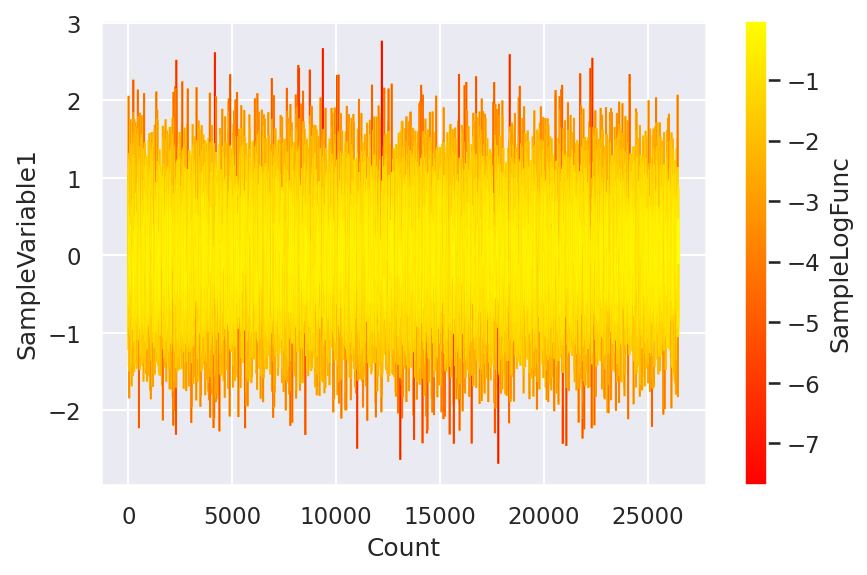

In [ ]:
pmpd.sampleList[0].plot.line()

ParaDRAM - NOTE: making the grid plot... 
generating subplot #1: (0,0) out of 4... done in 0.047947 seconds.
generating subplot #2: (0,1) out of 4... done in 0.348575 seconds.
generating subplot #3: (1,0) out of 4... done in 0.467582 seconds.
generating subplot #4: (1,1) out of 4... done in 0.047947 seconds.
generating colorbar... done in 0.018125 seconds.


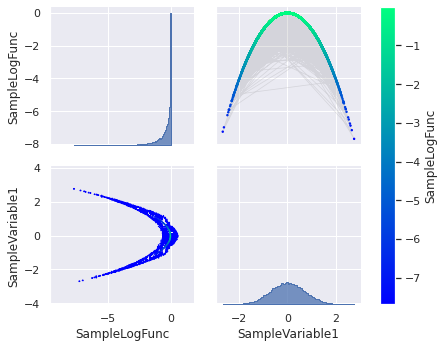

In [ ]:
pmpd.sampleList[0].plot.grid()

###### Il file di progresso

Il file di progresso è il file che termina con il suffisso "*_progress.txt*".<br>

Questo file contiene le informazioni in tempo reale sui progressi della simulazione a runtime :<br>
- numero di chiamate della funzione obiettivo;
- informazioni sull'efficienza totale del campionatore;
- informazioni sull'efficienza dinamica del campionatore salvate ogni **progressReportPeriod**. Questo è un valore che può essere modificato assegnandoli un valore in input alle *spec* dell'oggetto *ParaDRAM*;
- informazioni riguardo al tempo come :
    - tempo speso dall'inizio della simulazione;
    - tempo speso dall'ultimo report di progresso;
    - tempo stimato alla fine della simulazione;

In [ ]:
pmpd.readProgress()


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readProgress()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the progress file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/ParaDRAM_run_20210223_204510_160*_progress.txt"


ParaDRAM - NOTE: processing progress file: /content/ParaDRAM_run_20210223_204510_160_process_1_progress.txt
ParaDRAM - NOTE: reading the file contents... done in 0.003041 seconds.
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: adding the graphics tools... 
ParaDRAM - NOTE: creating a line plot object from scratch... done in 0.000136 seconds.
ParaDRAM - NOTE: creating a scatter plot object from scratch... done in 9.2e-05 seconds.

I valori all'interno dei file possono anche essere letti sotto forma di data frame, magari per una futura manipolazione.

In [ ]:
pmpd.progressList[0].df

,NumFuncCallTotal,NumFuncCallAccepted,MeanAcceptanceRateSinceStart,MeanAcceptanceRateSinceLastReport,TimeElapsedSinceLastReportInSeconds,TimeElapsedSinceStartInSeconds,TimeRemainedToFinishInSeconds
0,999,538,0.542959,0.542416,0.014366,0.014366,2.655878
1,1999,1088,0.544510,0.546060,0.012473,0.026839,2.439961
2,2999,1617,0.540753,0.533244,0.012588,0.039427,2.398842
3,3999,2177,0.543376,0.551241,0.012219,0.051646,2.320701
4,4999,2744,0.545289,0.552941,0.012334,0.063980,2.267648
...,...,...,...,...,...,...,...
176,176999,97929,0.551840,0.551938,0.013814,2.140755,0.045273
177,177999,98495,0.551924,0.566689,0.014785,2.155540,0.032937
178,178999,99067,0.552026,0.570162,0.014403,2.169943,0.020436
179,179999,99596,0.551926,0.534008,0.012755,2.182698,0.008854


ParaDRAM - NOTE: making the line plot... done in 0.126745 seconds.


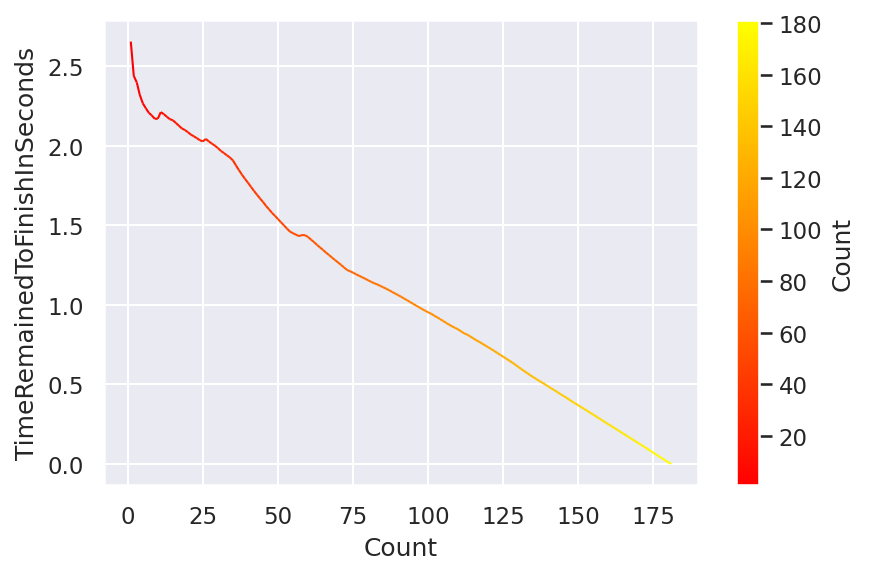

In [ ]:
pmpd.progressList[0].plot.line() 

###### File di riavvio

Il file di riavvio è il file che termina con "*_restart.bin*" o "*_restart.txt*".<br>
Il formato può essere specificato con il parametro **restartFileFormat** nelle *spec* dell'oggetto *ParaDRAM*.

Questo file contiene le informazioni per poter riavviare la simulazione quando avvengono delle interruzioni a runtime.<br>
Questa funzionalità permette di riprendere la simulazione sia in modalità seriale che parallela.

Questa caratteristica viene indicata come *completamente deterministica* nonostante la natura stocastica delle simulazioni Monte Carlo.<br>
Per permetterci di avere questa potenzialità dobbiamo essere sicuri di aver impostato il *randomSeed* e di fissare il prefisso dei file di output.

La funzione 
`
pmpd.readRestart()
`
ci permette di leggere i file di riavvio in formato "*.txt*".<br>
Mentre il formato binario "*.bin*" risulta utile in caso di un interruzione nell'esecuzione del campionamento, alla successiva esecuzione *runSampler()* controllerà se è presente il *file dei campioni* e, se il controllo avrà esito negativo, allora ci sarà il *riavvio*.

###### File della catena di output

Il file della catena di output termina con "*_chain.txt*" o con "*_chain.bin*" e, anche per questo file, possiamo sceglierne il formato la *spec* **chainFileFormat** dell'oggetto *ParaDRAM*.

Questo file contiene le informazioni delle chiamate  utili e non rigettate della funzione obiettivo. Queste informazioni sono:
1. **ProcessID** che è l'ID del processore che ha campionato con successo il punto corrente dalla funzione obiettivo;
2. **DelayedRejectionStage** che contiene la fase di "*delayed-rejection*" in cui il punto è stato accettato;
3. **MeanAcceptanceRate** che contiene la percentuale di accettazione media del campionatore aggiornato al punto di una riga;
4. **AdaptationMeasure** che misura l'adattamento effettuato sulla distrubuzione proposta dal campionatore. Questo è un valore fra 0 ed 1 che indica a 0 che non ci sono stati adattamenti ed ad 1 che ci sono stati adattamenti estremi a questo passo della simulazione.<br>
Tipicamente una buona simulazione inizia con questo valore vicino ad 1 e dopo poche centinaia di punti il valore tende a 0;
5. **BurninLocation** è il numero di punti che sono potenzialmente inutili e che devono essere scartati come **_burnin period_**;
6. **SampleWeight** rappresenta il numero di volte in cui un nuovo punto campionato è ripetuto nella *Markov chain* prima che il prossimo candidato sia accettato;
7. **SampleLogFunc** è il valore della funzione obiettivo;
8. La lista dei valori delle varibili che sono stati input della funzione obiettivo.

In [ ]:
pmpd.readChain()


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readChain()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the chain file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/ParaDRAM_run_20210223_204510_160*_chain.txt"


ParaDRAM - NOTE: processing chain file: /content/ParaDRAM_run_20210223_204510_160_process_1_chain.txt
ParaDRAM - NOTE: reading the file contents... done in 0.079411 seconds.
ParaDRAM - NOTE: ndim = 1, count = 100000
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.0

Anche in questo caso possiamo trovare le indicazioni di possibili funzioni da usare per plottare il grafico.

In [ ]:
pmpd.readMarkovChain()


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readMarkovchain()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the chain file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/ParaDRAM_run_20210223_204510_160*_chain.txt"


ParaDRAM - NOTE: processing chain file: /content/ParaDRAM_run_20210223_204510_160_process_1_chain.txt
ParaDRAM - NOTE: reading the file contents... done in 15.434325 seconds.
ParaDRAM - NOTE: ndim = 1, count = 180699
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done

Come possiamo notare, la stessa libreria fornisce un ampio accompagnamento al suo stesso utilizzo elencando un insieme di funzioni utilizzabili.<br>

#### Esperimenti

##### Primo Esperimento

In questo primo esperimento vogliamo riprendere l'esempio che riguardava il numero di messaggi medi giornalieri presi lungo un certo periodo di tempo e la verifica se il comportamento di un individuo è cambiato lungo tale periodo.

Come primo passo dobbiamo caricare i dati e li visualizziamo in un bar plot.

(0.0, 74.0)

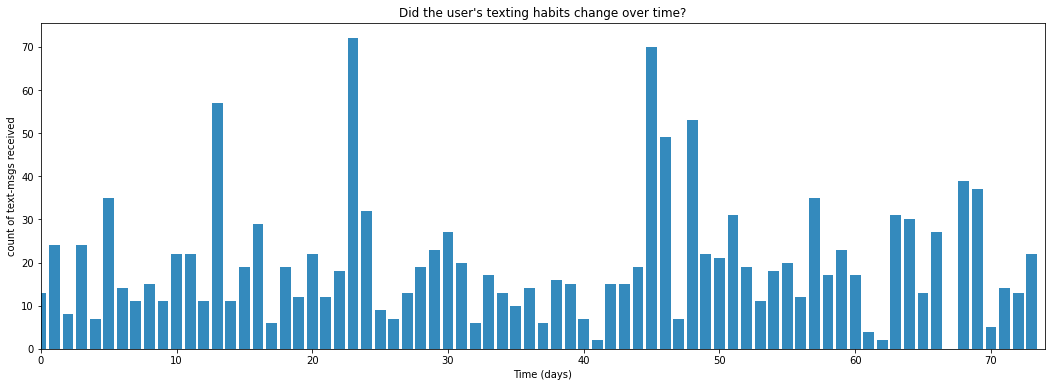

In [ ]:
path_drive = '/content/drive/MyDrive/Colab Notebooks/TrattamentoDellIncertezzaNellInformazione'

count_data = np.loadtxt(path_drive + "/data/txtdata.csv")
n_count_data = len(count_data)
plt.figure(figsize=(18,6))
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

Una volta che abbiamo visto i dati iniziamo, possiamo notare che, nella zona centrale del grafico sembra esserci un cambiamento nel comportamento del grafico. <br>

Quindi, una volta notato ciò lo vogliamo verificare.

Come prima cosa possiamo notare che il numero di messaggi medi giornalieri può essere modellato con una una distribuzione di Poisson per cui avremmo che il **_$C_i$_** ~ $P(\lambda)$.<br>
E con $C_i$ intendiamo indicare il valore per ogni singolo giorno quindi: <br> $C_i$ = n° messaggi medi del giorno i.<br>
Questo è importante poichè noi volgiamo verificare se c'è un cambiamento di comportamento evidenziato dai dati.

Notando ciò, possiamo introdurre il concetto di cambiamento di comportamento usando una variabile che permette lo switch, quindi potremmo ottenere che : 
$$ \lambda = \begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases} $$
Questo switch ci introduce all'uso di due parametri $lambda_i$ e all'uso di un $\tau$.<br>
Il $\tau$ ci serve per modellare la soglia oltre il quale avviene un cambiamento di comportamento, quindi anch'esso dev'essere modellato e poichè non abbiamo informazioni a priori possiamo utilizzare una **Uniforme(0,70)** (0 e 70 indicano l'indice dei dati, se avessimo uteriori informazioni, alla fine del campionamento potremmo trovare, ad esempio, la data in cui avviene un cambiamento). 

Notiamo che la Poisson usa un parametro $\lambda$ che in realtà non è singolo, ma sono due.<br>
Come possiamo, quindi, modellare questi parametri?<br>Potremmo utilizzare una distribuzione *Esponenziale* $Exp(\alpha)$.<br>
Ma perchè proprio una esponenziale?<br>
Il motivo è che se consideriamo la media campionaria dei valori otteniamo che :
$$ \frac{1}{N} \sum_{i=0}^{70}C_i = E[\lambda|\alpha] = \frac{1}{\alpha} $$

Quindi possiamo calcolare alpha come $\alpha = \frac{1}{media(C_i)}$

Ora procediamo con il codice.

Leggendo la documentazione della libreria ParaMonte possiamo notare che quello che ci viene chiesto è di scrivere, subito, la funzione della distribuzione a posteriori.<br>
Inoltre, per evitare l'uso di valori eccessivamente piccoli o eccessivamente grandi, la stessa documentazione suggerisce di utilizzare il logaritmo di tale funzione.

Quindi, ricordando che la struttura del teoremo ci fa ottenere : 
$$P(\lambda_1,\lambda_2,\tau|X) = P(X|\tau,\lambda_1,\lambda_2) * P(\lambda_1,\lambda_2|\tau) * P(\tau)$$

Quindi, $$log(P(\lambda_1,\lambda_2,\tau|X)) = log(P(X|\tau,\lambda_1,\lambda_2)) + log(P(\lambda_1,\lambda_2|\tau)) + log(P(\tau))$$

Quindi, in questo primo esempio, implementeremo solo la log likelihood per iniziare a familiarizzare con la libreria.

In [ ]:
class PrimoEsperimento():
    '''
    Questa classe ci servirà per poter calcolare le probabilità
    '''
    def __init__(self, data):
        self.dati = data
        self.ndati = self.dati.shape[0]
        self.media = np.sum(self.dati)/self.ndati
    
    def fattoriale(self,n):
        f = 1
        if n == 0:
            return f
        for i in range(int(n),0,-1):
            f *= i
        return np.float64(f)      

    def getLogPoisson(self, lamdba_, x):

        return np.log(lamdba_**x) - np.log(self.fattoriale(x)) -lamdba_

    def getLogProb(self, lambda_1, lambda_2, tau):
        risultati = []
        for indice in range(self.ndati):
            lambda_t = lambda_1 if indice < tau else lambda_2
            risultati.append(self.getLogPoisson(lambda_t, self.dati[indice] ) )

        return risultati

    def getLogLike(self,param):
        # param[0] = lambda_1
        # param[1] = lambda_2
        # param[2] = tau
        if param[0] < 0 or param[1]<0:
            # Poichè i valori dei lambda seguono una esponenziale
            return -1.e300
        if not (0<=param[2]<= self.ndati):
            # Poichè i valori di tau seguono una uniforme
            return -1.e300
        
        return np.sum(self.getLogProb(param[0],param[1],param[2]))

In [ ]:
esperimentoMessaggi = PrimoEsperimento(count_data)
# Istanziamo l'oggetto ParaDRAM
pmEsperimento = pm.ParaDRAM()
# Utilizziamo meno valori di campionamento rispetto a quelli di default 
# che sono 100'000
pmEsperimento.spec.chainSize = 50000 

pmEsperimento.spec.variableNameList = ["lambda_1", "lamnda_2", "tau"]
pmEsperimento.spec.startPointVec = [ 0,  # lambda_1
                                     0,  # lambda_2
                                     0 ] # tau 

pmEsperimento.spec.overwriteRequested = True

# # Questi parametri sono utili per una futura riproducibilità:
pmEsperimento.spec.randomSeed = 100
pmEsperimento.spec.outputFileName = "./EsperimentoMessaggi/messaggi"
pmEsperimento.spec.restartFileFormat = 'ascii'

# Andiamo ad eseguire il campionatore.
pmEsperimento.runSampler ( ndim = 3, 
                        getLogFunc = esperimentoMessaggi.getLogLike)



ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log



ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-format output restart file.
ParaDRAM - NOTE:     pmpd.readProgress()    # to read the contents of an output progress file.
ParaDRAM - NOTE: 
ParaDRAM - NOTE: where you should replace `pmpd` with your ParaDRAM sampler's object name.
ParaDRAM - NOTE: For more information and examples on the usage, visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte



Quindi, ora possiamo controllare se il sistema converge.<br>
Questo ci assicura di aver trovato dei dati che non abbiamo alta autocorrelazione, e quindi che abbiamo campionato in maniera ottima.

ParaDRAM - NOTE: making the line plot... done in 0.374061 seconds.


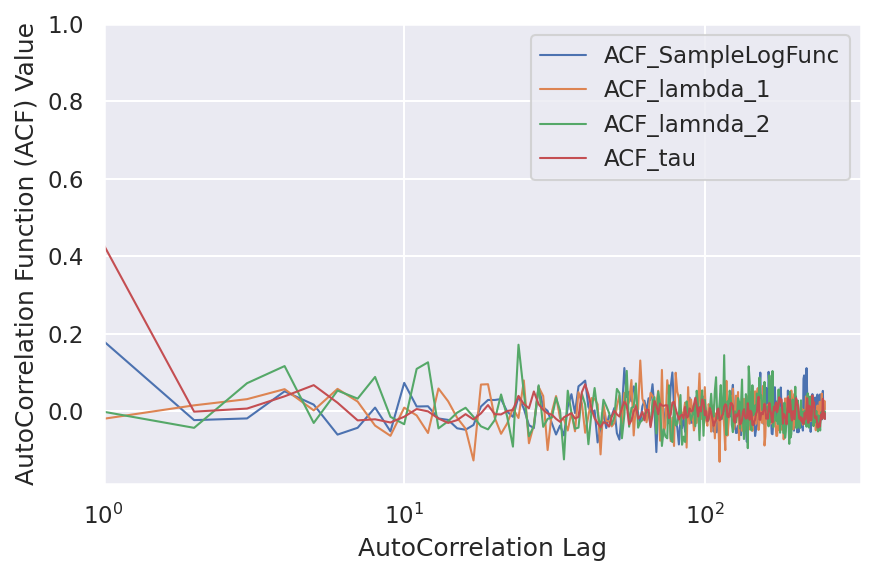

In [ ]:
sample.stats.autocorr.plot.line()

I valori vicino allo zero sono un ottimo indicatore di convergenza.<br>
Per un controllo completo è utile andare a leggere anche i file di chain e controllare la misura di adattamento.<br>
Tale misura è utile che abbia un valore che diminuisce con l'avanzare del campionamento.<br>


ParaDRAM - NOTE: processing chain file: /content/EsperimentoMessaggi/messaggi_process_1_chain.txt
ParaDRAM - NOTE: reading the file contents... done in 0.04851 seconds.
ParaDRAM - NOTE: ndim = 3, count = 37586
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.0187 seconds.
ParaDRAM - NOTE: computing the sample covariance matrix... 
ParaDRAM - NOTE: adding the covariance graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.015868 seconds.
ParaDRAM - NOTE: computing the sample autocorrelations... 


/usr/local/lib/python3.7/dist-packages/paramonte/_AutoCorr.py:254: RuntimeWarning: invalid value encountered in subtract
  xdata = self._dfref().iloc[self.rows,ivar].values.flatten() - np.mean(self._dfref().iloc[self.rows,ivar].values.flatten())


ParaDRAM - NOTE: adding the autocrrelation graphics tools... 
ParaDRAM - NOTE: creating a line plot object from scratch... done in 0.000133 seconds.
ParaDRAM - NOTE: creating a scatter plot object from scratch... done in 0.000243 seconds.
ParaDRAM - NOTE: creating a lineScatter plot object from scratch... done in 9.3e-05 seconds.
ParaDRAM - NOTE: adding the graphics tools... 
ParaDRAM - NOTE: creating a line plot object from scratch... done in 9.4e-05 seconds.
ParaDRAM - NOTE: creating a scatter plot object from scratch... done in 9.7e-05 seconds.
ParaDRAM - NOTE: creating a lineScatter plot object from scratch... done in 9.8e-05 seconds.
ParaDRAM - NOTE: creating a line3 plot object from scratch... done in 7.6e-05 seconds.
ParaDRAM - NOTE: creating a scatter3 plot object from scratch... done in 6e-05 seconds.
ParaDRAM - NOTE: creating a lineScatter3 plot object from scratch... done in 7e-05 seconds.
ParaDRAM - NOTE: creating a jointplot plot object from scratch... done in 0.000101 sec

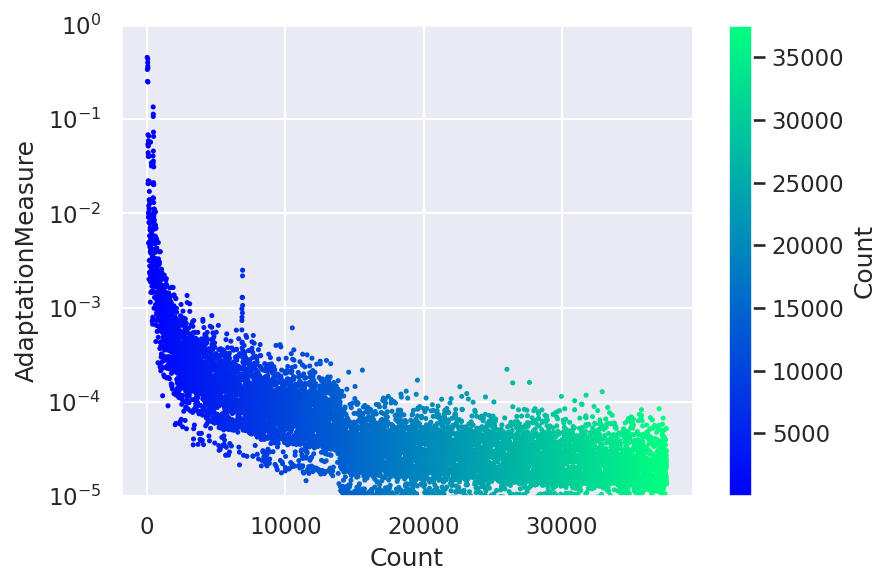

In [ ]:
chain = pmEsperimento.readChain(file = '/content/EsperimentoMessaggi/messaggi_process_1_chain.txt', delimiter=',',renabled=True)[0]
chain.plot.scatter.scatter.kws.cmap = "winter"
chain.plot.scatter(ycolumns="AdaptationMeasure",ccolumns=[])
chain.plot.scatter.currentFig.axes.set_ylim([1.e-5,1])
chain.plot.scatter.currentFig.axes.set_yscale("log")

ParaDRAM - NOTE: making the line plot... done in 0.434292 seconds.


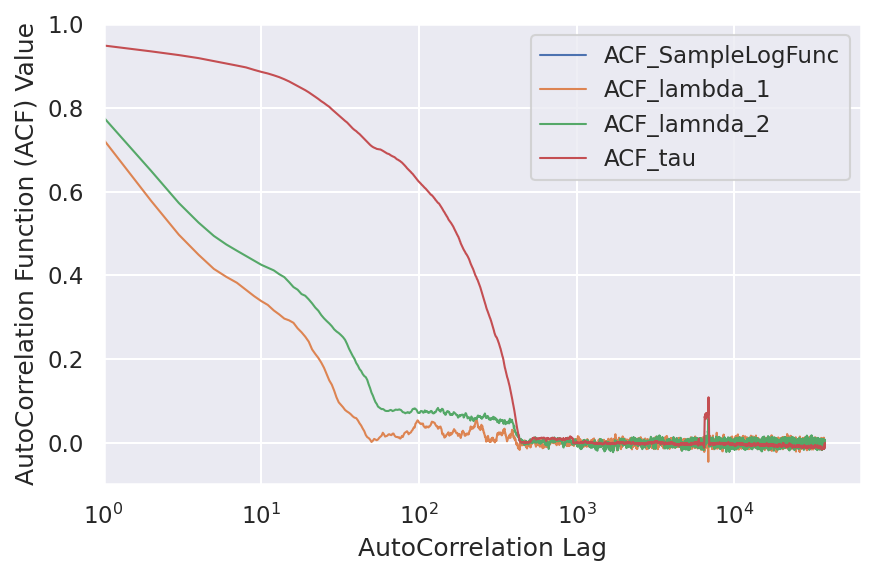

In [ ]:
chain.stats.autocorr.plot.line()

Come possiamo notare, i grafici dell'autocorrelazione suggeriscono un ottimo comportamento da parte dei campionatore, ciò è anche supportato dal comportamento della misura di adattività.

Ora possiamo controllare i campioni.

In [ ]:
pmEsperimento.readSample(file = '/content/EsperimentoMessaggi/messaggi_process_1_sample.txt')


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: processing sample file: /content/EsperimentoMessaggi/messaggi_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.011091 seconds.
ParaDRAM - NOTE: ndim = 3, count = 252
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.119554 seconds.
ParaDRAM - NOTE: computing the sample covariance matrix... 
ParaDRAM - NOTE: adding the covariance gr

Una volta letto il file "*sample.txt" possiamo procedere ad una sua analisi attraverso il plot dei dati.

ParaDRAM - NOTE: making the line plot... done in 0.173901 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/traceplotMessaggi_SampleLogFunc"
ParaDRAM - NOTE: done in 0.25002 seconds.
ParaDRAM - NOTE: making the line plot... done in 0.172317 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/traceplotMessaggi_lambda_1"
ParaDRAM - NOTE: done in 0.261204 seconds.
ParaDRAM - NOTE: making the line plot... done in 0.162049 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/traceplotMessaggi_lamnda_2"
ParaDRAM - NOTE: done in 0.266514 seconds.
ParaDRAM - NOTE: making the line plot... done in 0.16247 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/traceplotMessaggi_tau"
ParaDRAM - NOTE: done in 0.244994 seconds.


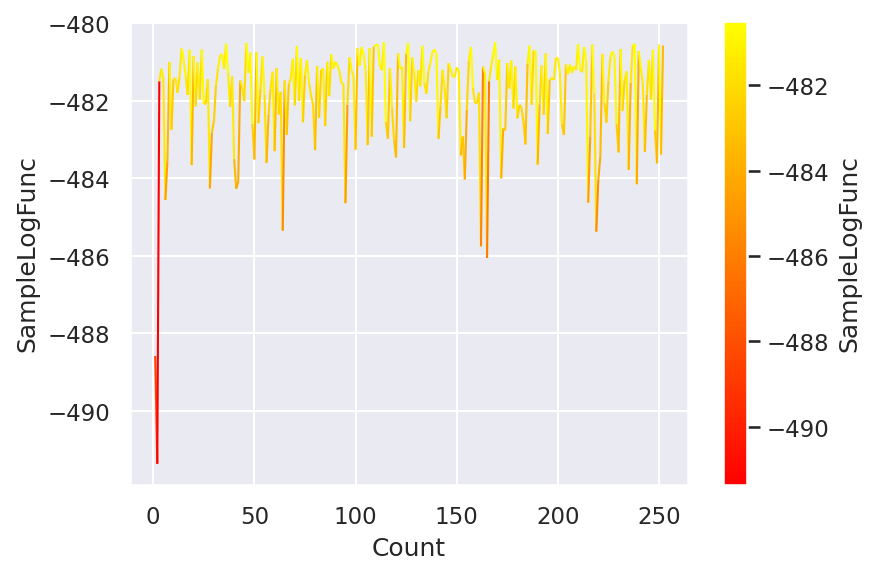

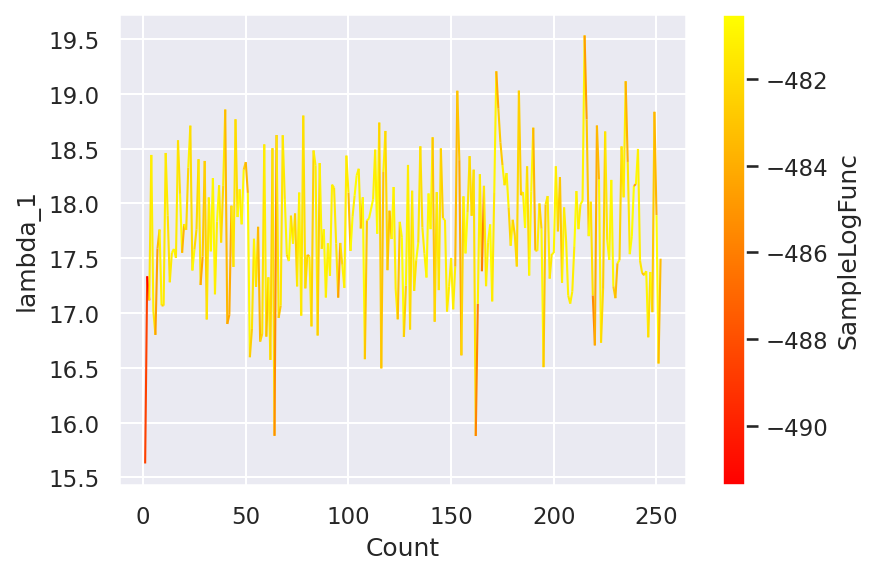

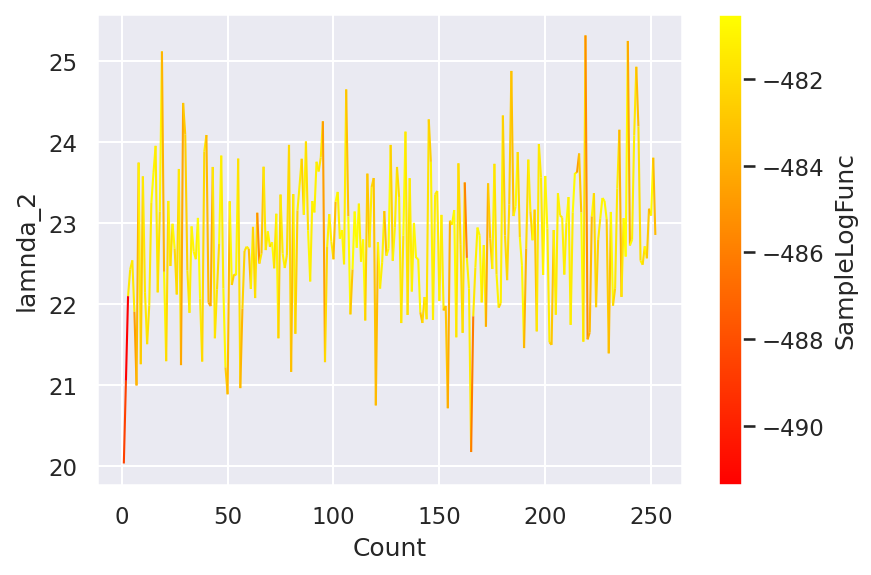

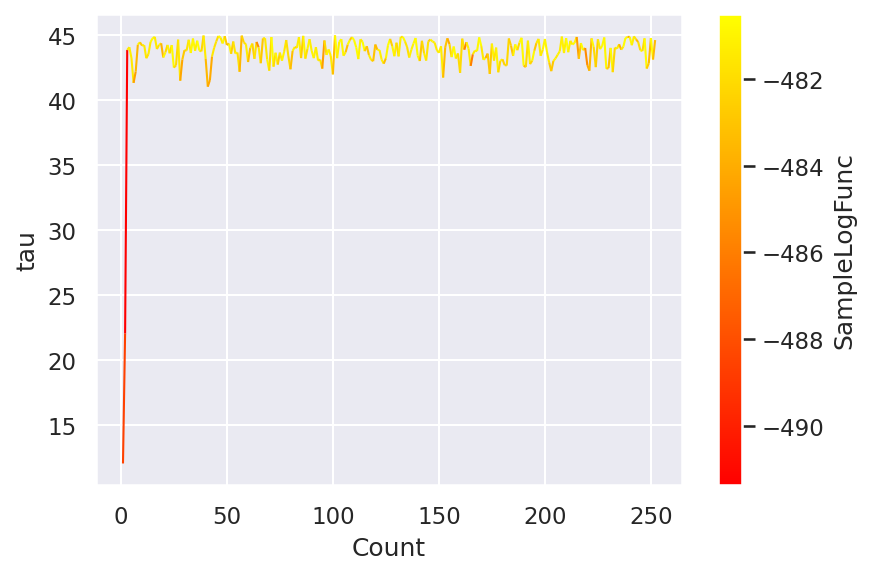

In [ ]:
sample = pmEsperimento.sampleList[0]

for colname in pmEsperimento.sampleList[0].df.columns:
    sample.plot.line.ycolumns = colname
    sample.plot.line()
    sample.plot.line.currentFig.axes.set_xlabel("Count")
    sample.plot.line.currentFig.axes.set_ylabel(colname)
    sample.plot.line.savefig( fname = "/content/EsperimentoMessaggi/traceplotMessaggi_" + colname )

Da questi grafici possiamo notare come il campionatore si sia mosso verso i valori da campionare.<br>

Per poter guardare tali dati in un formato più intuitivo possiamo utilizzare il plot tramite istogrammi.

ParaDRAM - NOTE: making the histplot plot... done in 0.108364 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/histogramMessaggi_SampleLogFunc"
ParaDRAM - NOTE: done in 0.207055 seconds.
ParaDRAM - NOTE: making the histplot plot... done in 0.104062 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/histogramMessaggi_lambda_1"
ParaDRAM - NOTE: done in 0.321982 seconds.
ParaDRAM - NOTE: making the histplot plot... done in 0.096157 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/histogramMessaggi_lamnda_2"
ParaDRAM - NOTE: done in 0.202584 seconds.
ParaDRAM - NOTE: making the histplot plot... done in 0.098108 seconds.
ParaDRAM - NOTE: saving the plot to file: "/content/EsperimentoMessaggi/histogramMessaggi_tau"
ParaDRAM - NOTE: done in 0.201199 seconds.


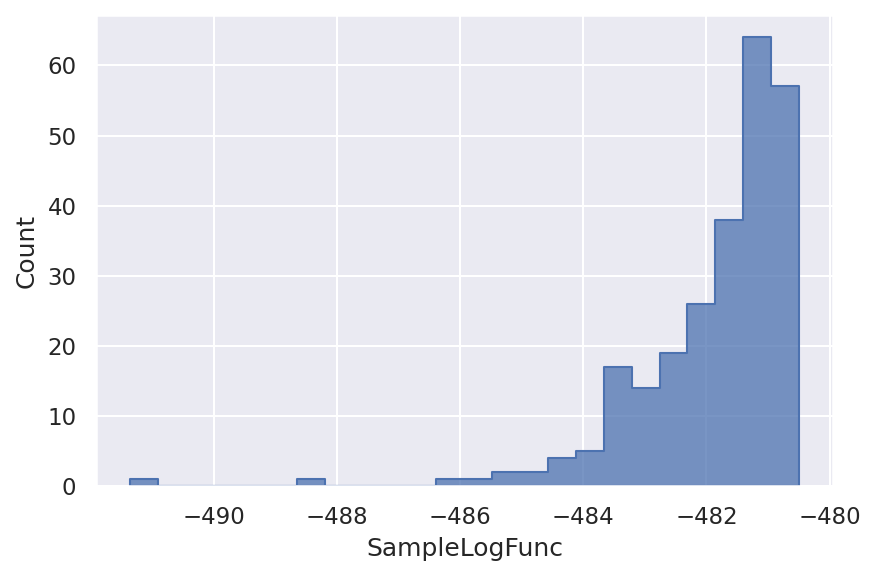

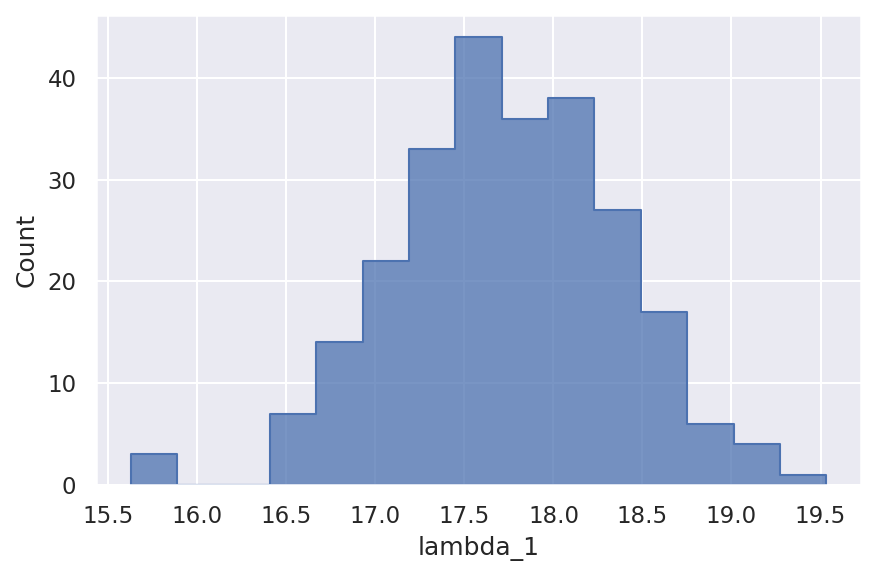

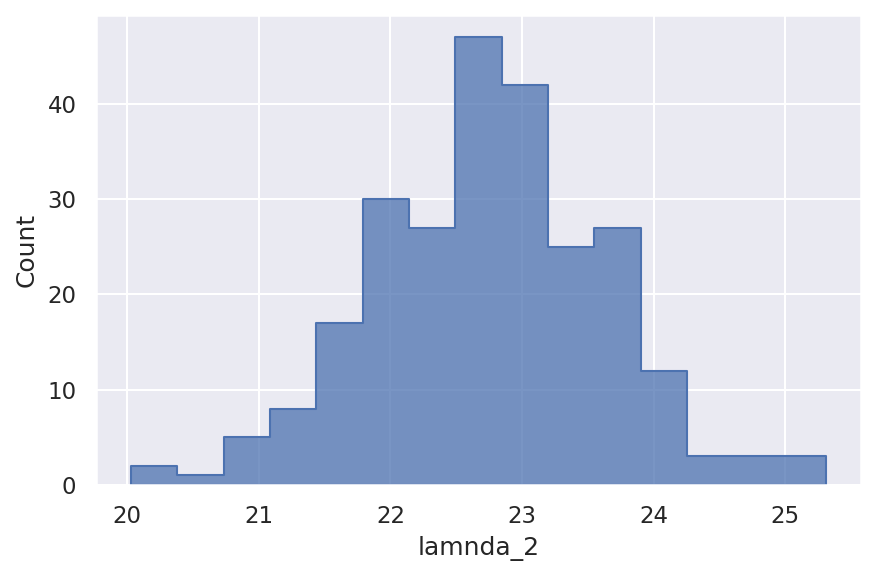

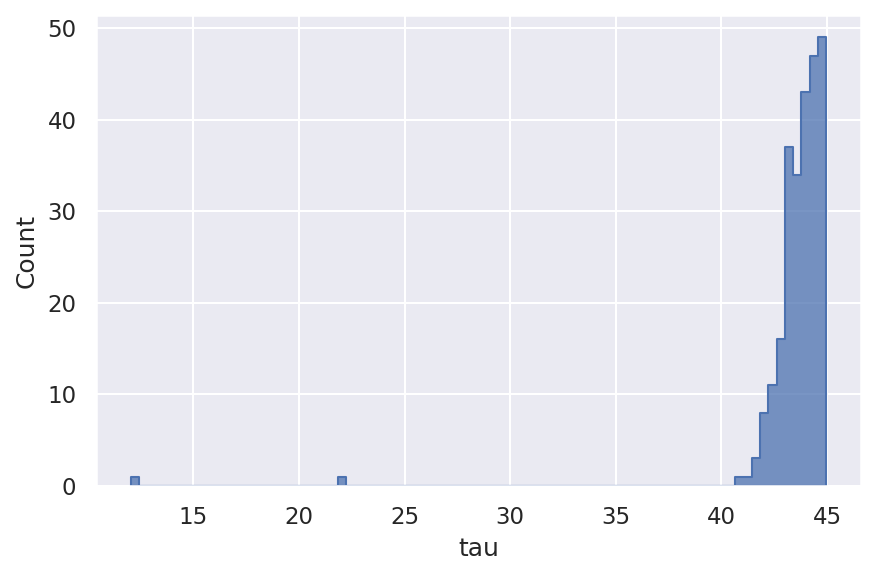

In [ ]:
for colname in pmEsperimento.sampleList[0].df.columns:
    sample.plot.histplot(xcolumns = colname)
    sample.plot.histplot.currentFig.axes.set_xlabel(colname)
    sample.plot.histplot.currentFig.axes.set_ylabel("Count")
    sample.plot.histplot.savefig( fname = "/content/EsperimentoMessaggi/histogramMessaggi_" + colname )

Dalle posteriori possiamo notare come le distribuzioni delle due $\lambda_i$ abbiamo una media differente, quindi questo suggerisce il cambiamento di comportamento, e la distribuzione di $\tau$ suggerisce il possibile indice che indica il momento di cambiamento di comportamento.<br>

Inoltre è da notare che la distribuzione di $\tau$ si è formata attraverso l'analisi dei dati e che noi a priori non abbiamo dato particolari informazioni su questo valore.<br>
Infatti, guardando il grafico avevamo ipotizzato che ci fosse stato un cambiamento nella zona centrale, ma la modellazione teorica con una distribuzione uniforme e la realizzazione pratica della solo verosimiglianza logaritmica ci ha messo in una situazione di ignoranza riguardo a ciò.

Una delle funzione che può risultare molto utile è quella del plot di una griglia di grafici che ci permette di apprezzare sulle diagonali le posteriori e sugli altri elementi i rapporti fra una variabile e l'altra.

ParaDRAM - NOTE: making the grid plot... 
generating subplot #1: (0,0) out of 16... done in 0.057597 seconds.
generating subplot #2: (0,1) out of 16... done in 0.849375 seconds.
generating subplot #3: (0,2) out of 16... done in 0.902411 seconds.
generating subplot #4: (0,3) out of 16... done in 0.830602 seconds.
generating subplot #5: (1,0) out of 16... done in 1.097126 seconds.
generating subplot #6: (1,1) out of 16... done in 0.057597 seconds.
generating subplot #7: (1,2) out of 16... done in 0.870179 seconds.
generating subplot #8: (1,3) out of 16... done in 0.832397 seconds.
generating subplot #9: (2,0) out of 16... done in 1.094668 seconds.
generating subplot #10: (2,1) out of 16... done in 1.076803 seconds.
generating subplot #11: (2,2) out of 16... done in 0.057597 seconds.
generating subplot #12: (2,3) out of 16... done in 0.874139 seconds.
generating subplot #13: (3,0) out of 16... done in 1.075771 seconds.
generating subplot #14: (3,1) out of 16... done in 1.102303 seconds.
g

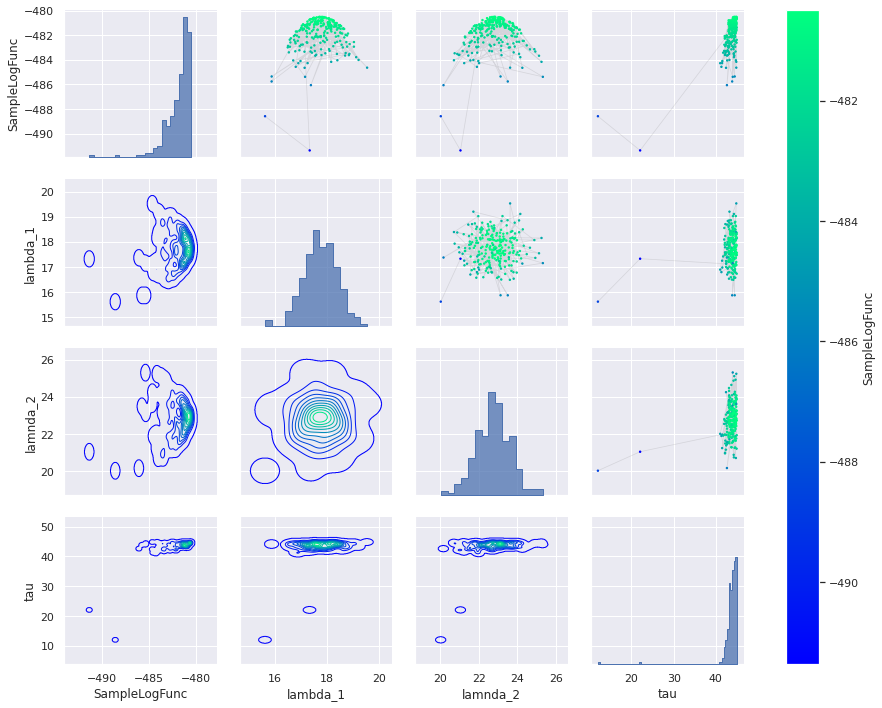

In [ ]:
sample.plot.grid()

##### Secondo Esperimento

Il secondo esempio richiama quello della determinazione del A/B test.<br>

Abbiamo, in questo caso, due prodotti e vogliamo sapere quale di questi sia utile da produrre per ottenere dei guadagni.<br>

Per fare ciò prendiamo un insieme di 1000 persone e chiediamo ad ognuna separatamente se acuisterebbe o meno il prodotto che sta visionando.<br>

Quindi ci chiediamo qual'è la distribuzione di probabilità di acquisto di un prodotto piuttosto che l'altro.<br>
Poichè stiamo usando delle distribuzioni ci piacerebbe avere anche un indicatore che ci permetta di comprendere il comportamento di un prodotto rispetto all'altro, quindi se $p_A$ è la probabilità di acquisto del prodotto A e $p_B$ è la probabiltità di acquisto del prodotto B, allora l'indicatore potrebbe essere un delta = $p_A - p_B$. Anche questo indicatore avrebbe una distribuzione.

Iniziamo con la creazione del nostro dataset sintetico.<br>
Il comportamento di scegliere se acquistare o meno un prodotto può essere modellato attraverso l'uso di una Bernoulliana.<br>

In [ ]:
p_A = 0.08
p_B = 0.05

N_ = 1500

#generate some observations
prodotto_A = stats.bernoulli.rvs(p_A, size=N_)
prodotto_B = stats.bernoulli.rvs(p_B, size=N_)

Text(0.5, 1.0, 'prodotto B')

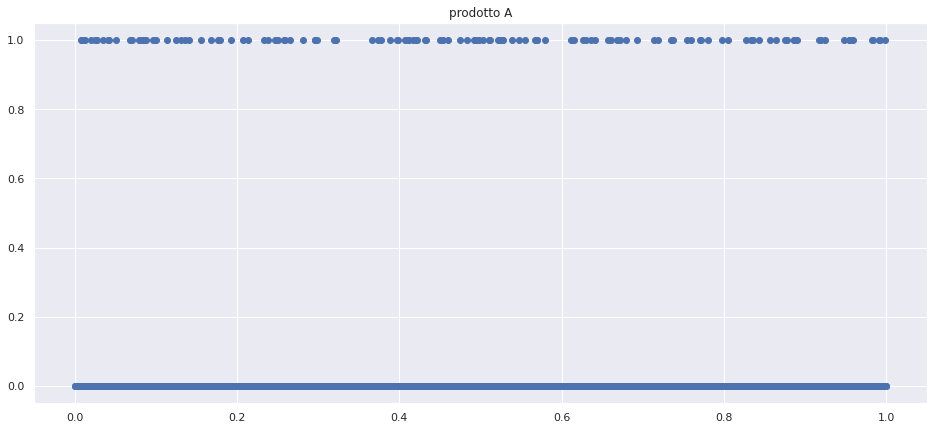

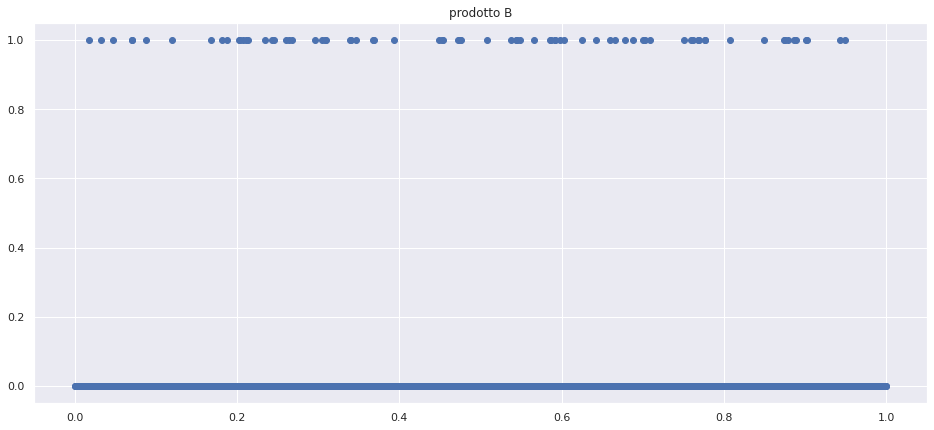

In [ ]:
# Questi plot servono per controllare che i dati siano stati generati correttamente
plt.figure(figsize=(16,7))
plt.scatter(np.linspace(0,1,N_),prodotto_A)
plt.title('prodotto A')
plt.figure(figsize=(16,7))
plt.scatter(np.linspace(0,1,N_),prodotto_B)
plt.title('prodotto B')

Non abbiamo informazioni a priori sulle due probabilità $p_A$ e $p_B$, quindi supponiamo entrambe uniformi.<br>
Quindi avremo che :
$$P(p_A|X) = P(X|p_A) * P(p_A) \\\ P(p_B|X) = P(X|p_B) * P(p_B)$$
Delta non è presente poichè non influenzerà la distribuzione.<br>
Considerando l'esperimento precedente riportiamo il tutto in forma logaritmica(solo per una formula poichè il comportamento è simile) :
$$log(P(p_A|X)) = log(P(X|p_A)) + log(P(p_A))$$
Ma $p_A$ e $p_B$ $\thicksim$ $U(0,1)$ $= \frac{1}{1-0} = 1$, per cui $log(P(p_A))$ o $log(P(p_B))$ sono uguali a $log(1) = 0$ .

Evidenziando ciò si procederà alla codifica della verosimiglianza logaritmica, mentre le altre informazioni saranno incorporate per aiutare nell'esplorazione.

Siamo difronte a due distribuzioni, quindi delta verrà calcolato successivamente.

In [ ]:
class SecondoEsperimento():
    '''
    Questa classe ci servirà per poter calcolare le probabilità
    '''
    def __init__(self, data):
        self.dati = data
        self.ndati = self.dati.shape[0]

    def getLogProb(self, p_):
        indici_1 = self.dati == 1
        risultati = np.zeros(self.ndati)
        risultati[indici_1] = np.log(p_)
        risultati[~indici_1] = np.log((1-p_))
        return risultati

    def getLogLike(self,param):
        # param[0] = p_
        if not (0 <= param[0] <= 1):
            # Poichè i valori di p_A e p_B seguono una uniforme fra 0 e 1
            return -1.e300       
        return np.sum(self.getLogProb(param[0]))

In [ ]:
probabilitaA = SecondoEsperimento(prodotto_A)
probabilitaB = SecondoEsperimento(prodotto_B)

In [ ]:
pmEsperimentoA = pm.ParaDRAM()

pmEsperimentoA.spec.chainSize = 50000 

pmEsperimentoA.spec.variableNameList = ["ProbabilitàA"]
pmEsperimentoA.spec.startPointVec = [ 0.01 ] # P_A

pmEsperimentoA.spec.overwriteRequested = True

# # Questi parametri sono utili per una futura riproducibilità:
pmEsperimentoA.spec.randomSeed = 117
pmEsperimentoA.spec.outputFileName = "./EsperimentoAB/prodottoA"
pmEsperimentoA.spec.restartFileFormat = 'ascii'

# Andiamo ad eseguire il campionatore.
pmEsperimentoA.runSampler( ndim = 1, 
                        getLogFunc = probabilitaA.getLogLike)


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-format output restart file.
ParaDRAM 

In [ ]:
pmEsperimentoB = pm.ParaDRAM()

pmEsperimentoB.spec.chainSize = 50000 

pmEsperimentoB.spec.variableNameList = ["ProbabilitàB"]
pmEsperimentoB.spec.startPointVec = [ 0.01 ] # P_B

pmEsperimentoB.spec.overwriteRequested = True

# # Questi parametri sono utili per una futura riproducibilità:
pmEsperimentoB.spec.randomSeed = 117
pmEsperimentoB.spec.outputFileName = "./EsperimentoAB/prodottoB"
pmEsperimentoB.spec.restartFileFormat = 'ascii'

# Andiamo ad eseguire il campionatore.
pmEsperimentoB.runSampler( ndim = 1, 
                        getLogFunc = probabilitaB.getLogLike)


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output sample file.
ParaDRAM - NOTE:     pmpd.readChain()       # to read the uniquely-accepted points from the output chain file.
ParaDRAM - NOTE:     pmpd.readMarkovChain() # to read the Markov Chain. NOT recommended for very large chains.
ParaDRAM - NOTE:     pmpd.readRestart()     # to read the contents of an ASCII-format output restart file.
ParaDRAM 

In [ ]:
pmEsperimentoA.readChain(file = '/content/EsperimentoAB/prodottoA')


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readChain()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the chain file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/EsperimentoAB/prodottoA*_chain.txt"


ParaDRAM - NOTE: processing chain file: /content/EsperimentoAB/prodottoA_process_1_chain.txt
ParaDRAM - NOTE: reading the file contents... done in 0.05042 seconds.
ParaDRAM - NOTE: ndim = 1, count = 50000
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.016976 seconds.
ParaD

ParaDRAM - NOTE: making the scatter plot... done in 0.180107 seconds.


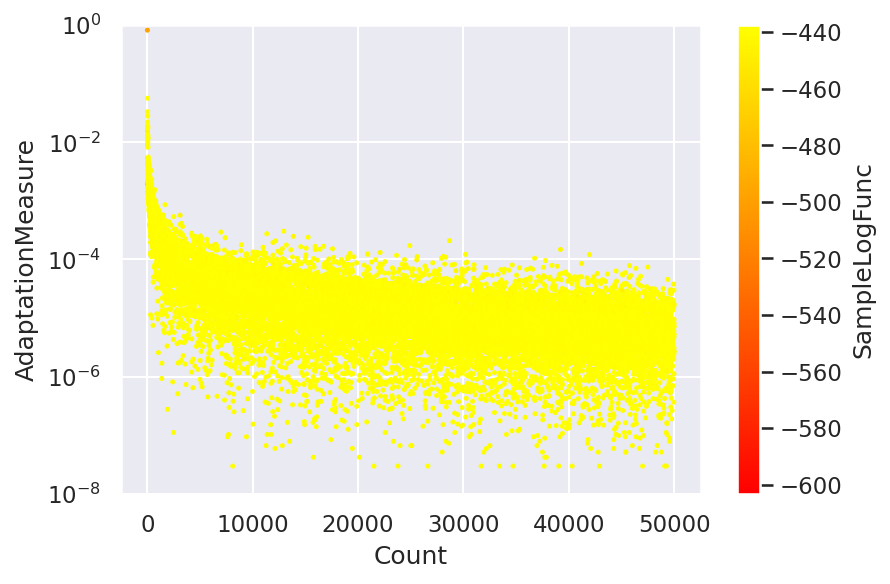

In [ ]:
chainA = pmEsperimentoA.chainList[0]
chainA.plot.scatter(ycolumns="AdaptationMeasure")
chainA.plot.scatter.currentFig.axes.set_ylim([1.e-8,1])
chainA.plot.scatter.currentFig.axes.set_yscale("log")

ParaDRAM - NOTE: making the line plot... done in 0.392297 seconds.


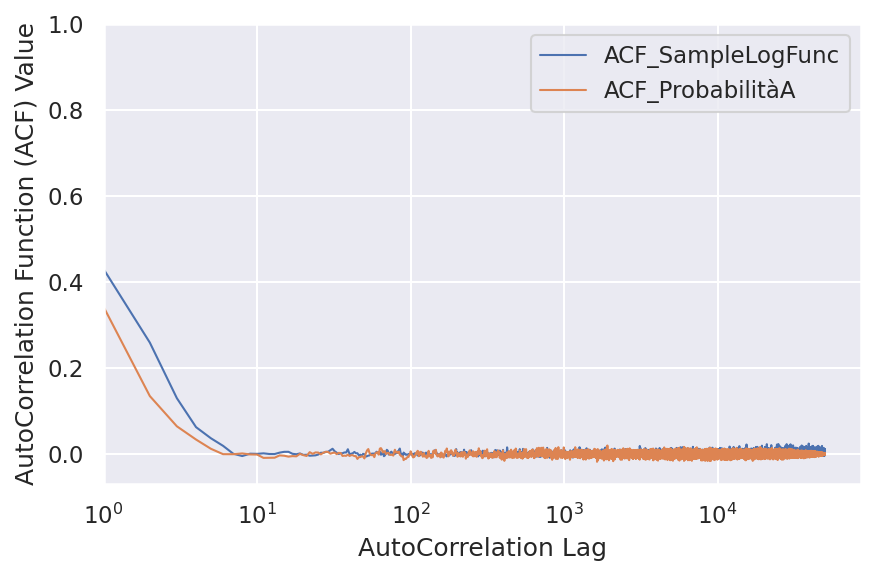

In [ ]:
chainA.stats.autocorr.plot.line()

Ora che abbiamo verificato se la distribuzione della probabilità di acquisto di A sia autocorrelata, lo verifichiamo anche per il prodotto B.


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readChain()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the chain file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/EsperimentoAB/prodottoB*_chain.txt"


ParaDRAM - NOTE: processing chain file: /content/EsperimentoAB/prodottoB_process_1_chain.txt
ParaDRAM - NOTE: reading the file contents... done in 0.039355 seconds.
ParaDRAM - NOTE: ndim = 1, count = 50000
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.01802 seconds.
ParaD

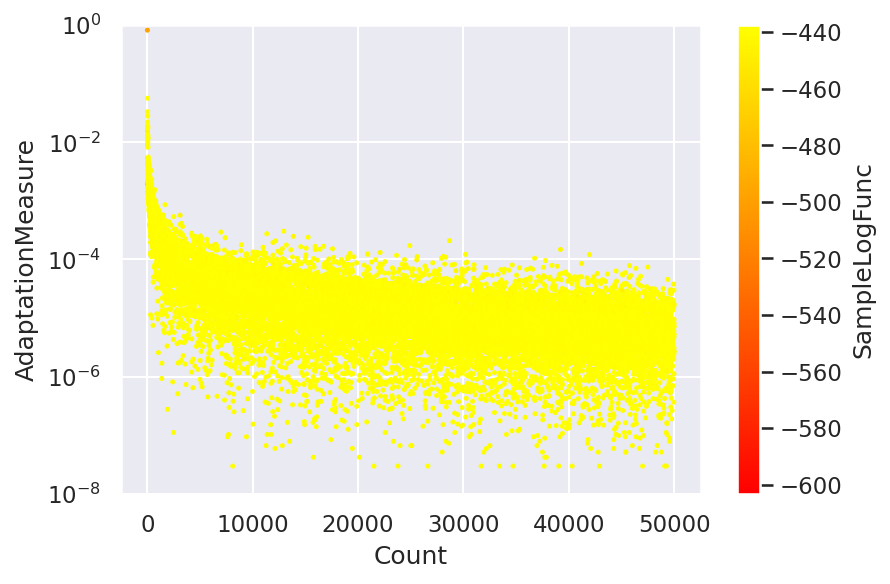

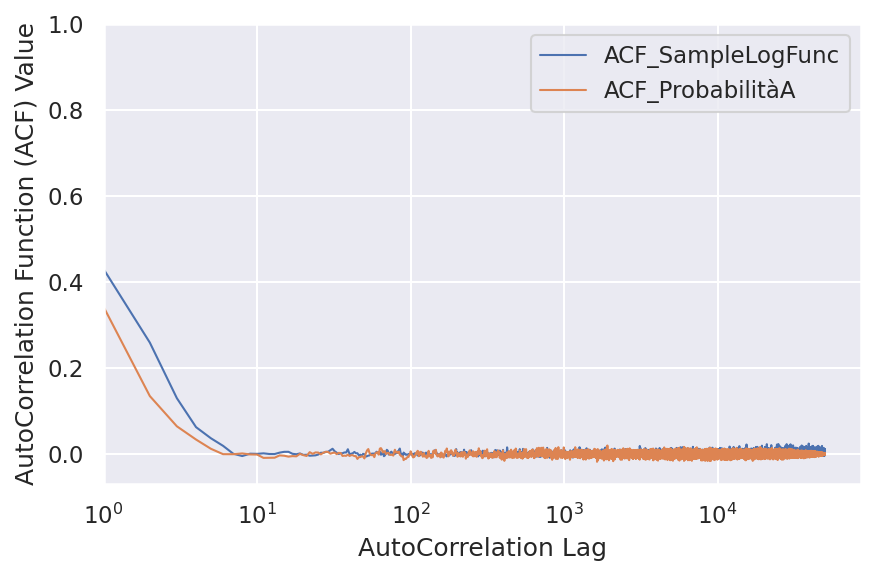

In [ ]:
pmEsperimentoB.readChain(file = '/content/EsperimentoAB/prodottoB')
chainB = pmEsperimentoA.chainList[0]
chainB.plot.scatter(ycolumns="AdaptationMeasure")
chainB.plot.scatter.currentFig.axes.set_ylim([1.e-8,1])
chainB.plot.scatter.currentFig.axes.set_yscale("log")
chainB.stats.autocorr.plot.line()

Anche in questo caso notiamo che il campionatore ha prodotto dei risultati non autocorrelati che possiamo considerare ottimi.

Ora procediamo alla lettura dei campioni in modo da ottenere una distribuzione a posteriori.

In [ ]:
pmEsperimentoA.readSample(file = '/content/EsperimentoAB/prodottoA')
pmEsperimentoB.readSample(file = '/content/EsperimentoAB/prodottoB')


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "/content/EsperimentoAB/prodottoA*_sample.txt"


ParaDRAM - NOTE: processing sample file: /content/EsperimentoAB/prodottoA_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.014385 seconds.
ParaDRAM - NOTE: ndim = 1, count = 23569
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM - NOTE: creating a heatmap plot object from scratch... done in 0.018927 seconds.

ParaDRAM - NOTE: making the kdeplot1 plot... 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


done in 0.436905 seconds.
ParaDRAM - NOTE: making the kdeplot1 plot... 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


done in 0.303092 seconds.


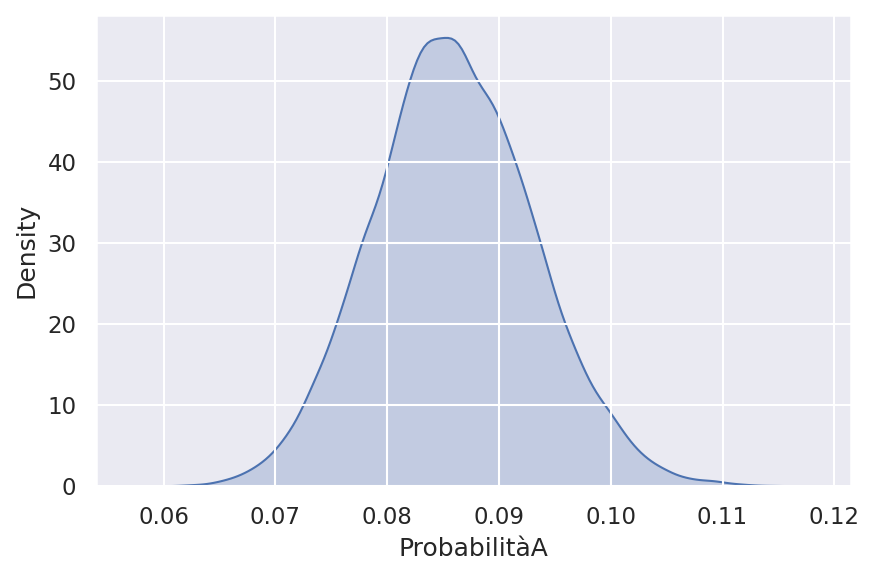

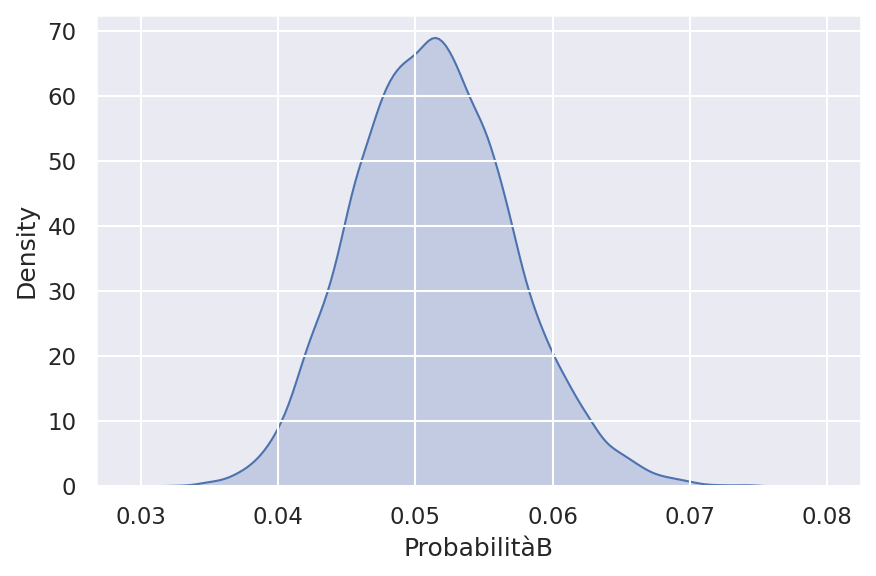

In [ ]:
sampleA = pmEsperimentoA.sampleList[0]
sampleB = pmEsperimentoB.sampleList[0]

sampleA.plot.kdeplot1()
sampleB.plot.kdeplot1()

Una volta ottenute le distribuzioni notiamo che hanno un comportamento che può essere ricondotto ad una gaussiana.<br>
Quindi se : $$ p_A \thicksim N(\mu,\sigma) $$

possiamo dedurre che $E[p_A] = \mu = MAP$ e che $\sigma$ lo possiamo dedurre dai dati.

In [ ]:
map_p_a = sampleA.stats.maxLogFunc.state[0]
map_p_b = sampleB.stats.maxLogFunc.state[0]
std_p_a = np.std(sampleA.df['ProbabilitàA'])
std_p_b = np.std(sampleB.df['ProbabilitàB'])
print('MAP P_a',map_p_a,', valore reale :',p_A)
print('MAP P_b',map_p_b,', valore reale :',p_B)

MAP P_a 0.085332185 , valore reale : 0.08
MAP P_b 0.050662139 , valore reale : 0.05


Conoscendo la MAP e la devizione standard possiamo calcolare la distribuzione delle differenze fra i valori delle due probabilità.<br>
In questo caso siamo fortunati poichè usando due Gaussiane avremo che la distribuzione delle differenze fra le due distribuzioni avrà sempre il comportamento di una Gaussiana, quindi:
$$ Z \thicksim N(\mu,\sigma) \\e\ \ Z = p_A - p_B
\\poiche'\ p_A \thicksim N(\mu_A,\sigma_A)\ e\ p_B \thicksim N(\mu_B,\sigma_B)\\
allora \mu = \mu_A - \mu_B\ e\ \sigma = \sigma_A + \sigma_B$$

(-0.02, 0.1)

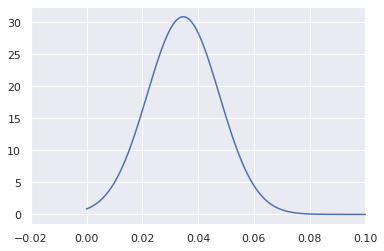

In [ ]:
x = np.linspace(0,1,1000)
plt.plot(x, stats.norm.pdf(x, 
                           loc = map_p_a - map_p_b , 
                           scale = std_p_a + std_p_b))
plt.xlim((-0.02,0.1))

La distribuzione appena plottata mostra una massa probabilistica più ampia per i valori positivi.<br> 
Ciò indica che la differenza fra le probabilità d'acquisto del prodotto A e delle probabilità d'acquisto del prodotto B è spesso positiva e che sia preferibile scegliere di produrre il prodotto A.